✅ 图片已保存到: side_view.png


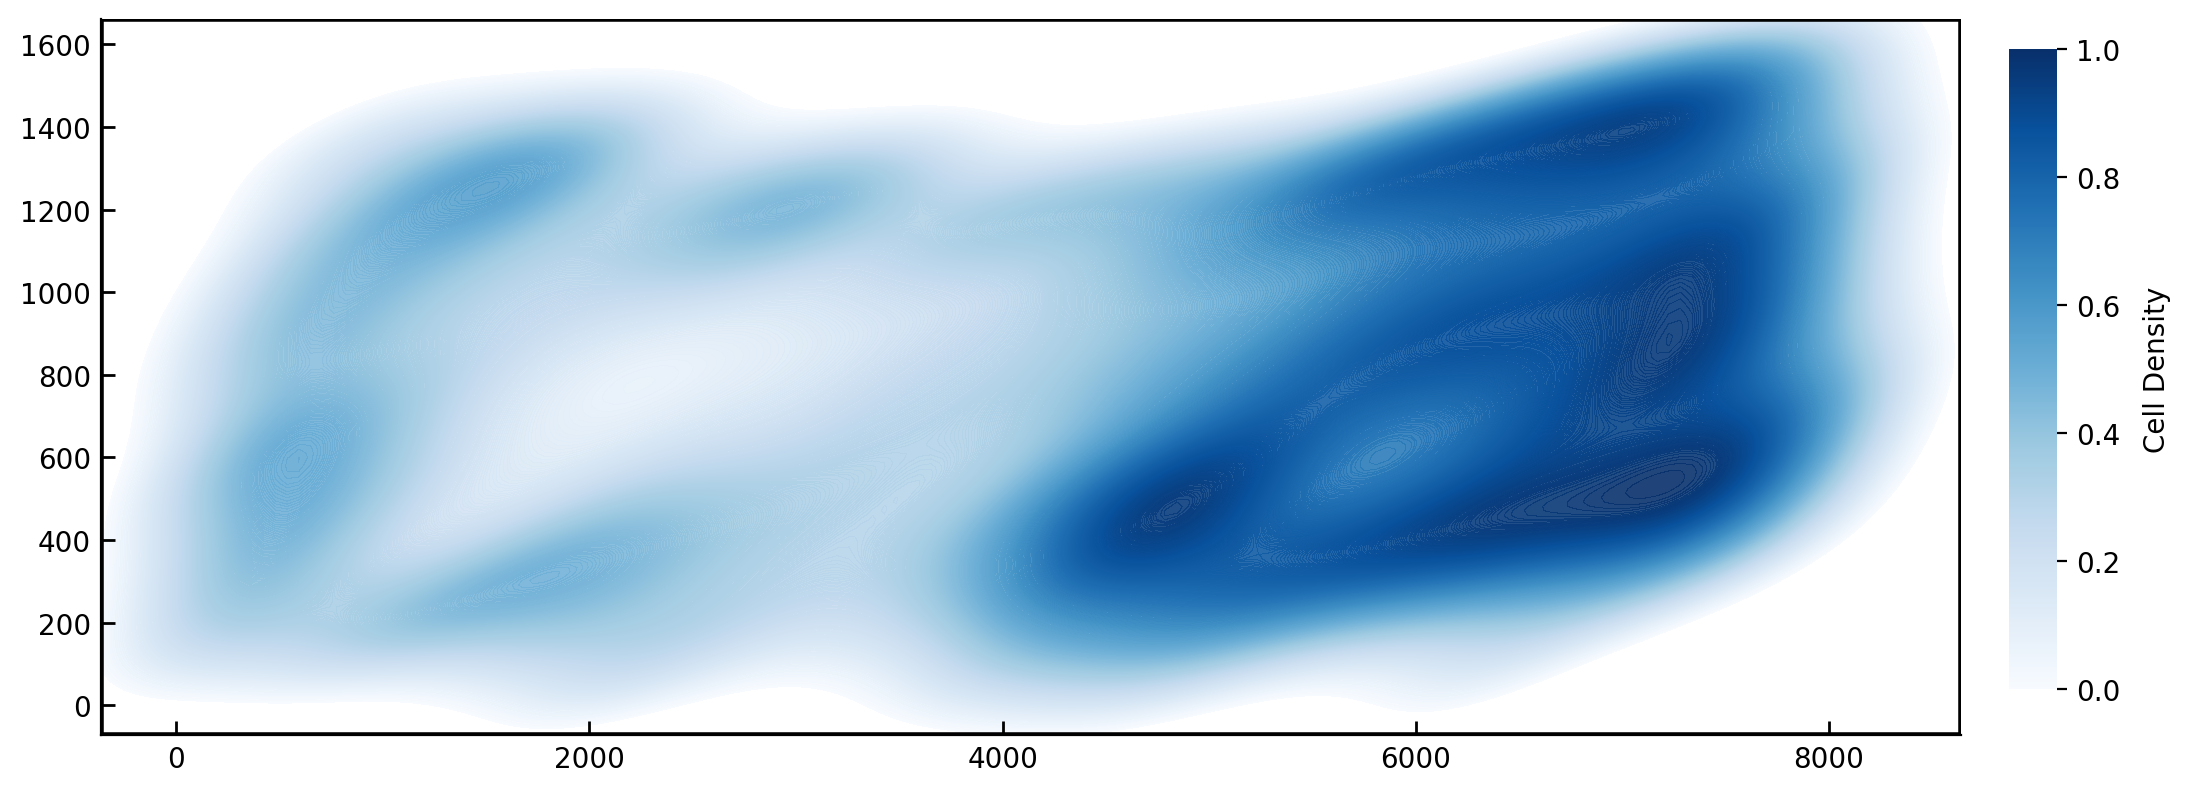

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import numpy as np

# 适配 macOS Retina 屏幕
plt.rcParams['figure.dpi'] = 200  

def plot_circular_density(file_path, cmap_color="Blues", save_path="circular_density_plot.png"):
    """
    读取 CSV 数据并绘制 KDE 密度图，确保所有坐标点都在图中展示，
    形状调整为 1:3 的长方形，添加紧贴边界的黑色边框，并显示刻度。

    参数:
    - file_path: CSV 文件路径
    - cmap_color: 颜色映射（如 "Greens" 或 HTML 颜色代码 "#FF5733"）
    - save_path: 图片保存路径
    """
    
    # 读取数据
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"文件读取错误: {e}")
        return

    # 确保数据包含 'x' 和 'y' 列
    if not {'x', 'y'}.issubset(df.columns):
        print("错误: CSV 文件必须包含 'x' 和 'y' 列！")
        return
    
    # 确保数据是数值型
    df['x'] = pd.to_numeric(df['x'], errors='coerce')
    df['y'] = pd.to_numeric(df['y'], errors='coerce')

    if df.isnull().values.any():
        print("错误: 数据包含无效值，无法绘制！")
        return

    # **计算坐标轴范围，确保所有点都可见**
    x_min, x_max = df['x'].min(), df['x'].max()
    y_min, y_max = df['y'].min(), df['y'].max()
    padding_x = (x_max - x_min) * 0.05  # 5% 额外边距
    padding_y = (y_max - y_min) * 0.05  # 5% 额外边距

    # **创建 1:3 的长方形绘图区域**
    fig, ax = plt.subplots(figsize=(12, 8))  # **长:宽 = 3:1**

    # 解析颜色映射
    if cmap_color.startswith("#"):
        try:
            cmap_color = mcolors.LinearSegmentedColormap.from_list("custom", [cmap_color])
        except ValueError:
            print(f"错误: 无法解析颜色 {cmap_color}，请使用有效颜色！")
            return
    else:
        cmap_color = sns.color_palette(cmap_color, as_cmap=True)

    # **绘制 KDE 密度图**
    try:
        kde = sns.kdeplot(
            x=df.x, y=df.y, 
            cmap=cmap_color, 
            fill=True, 
            levels=500,    
            bw_adjust=0.9, 
            ax=ax, 
            alpha=0.9    
        )
    except Exception as e:
        print(f"KDE 计算错误: {e}")
        return

    # **确保所有点可见**
    ax.set_xlim(x_min - padding_x, x_max + padding_x)
    ax.set_ylim(y_min - padding_y, y_max + padding_y)

    # **修正 x 和 y 轴的比例（确保 x 轴比 y 轴长 3 倍）**
    ax.set_aspect(2, adjustable='box')

    # **仅显示 x 和 y 轴上的刻度**
    ax.tick_params(axis='both', which='both', direction='in', length=5, width=1, colors='black')

    # **去掉上边框和右边框**
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)

    # **隐藏 x 轴和 y 轴的标题**
    ax.set_xlabel("")
    ax.set_ylabel("")

    # **添加紧贴数据范围的黑色边框**
    border_rect = Rectangle(
        (x_min - padding_x, y_min - padding_y),  
        (x_max - x_min) + 2 * padding_x,  
        (y_max - y_min) + 2 * padding_y,  
        linewidth=2, edgecolor='black', facecolor='none'
    )
    ax.add_patch(border_rect)

    # **添加颜色比例尺**
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # **调整位置**
    norm = plt.Normalize(vmin=0, vmax=1)  # 归一化颜色映射
    sm = plt.cm.ScalarMappable(cmap=cmap_color, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # **优化比例尺**
    cbar.outline.set_visible(False)  
    cbar.set_label("Cell Density", fontsize=10, labelpad=8)

    # **保存图片**
    fig.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)  
    print(f"✅ 图片已保存到: {save_path}")

    # 显示图像
    plt.show()

# 设置数据文件路径
file_path = "side view-坐标.csv"

# 运行绘制并保存图片
plot_circular_density(file_path, cmap_color="Blues", save_path="side_view.png")

✅ 图片已保存到: top_view.png


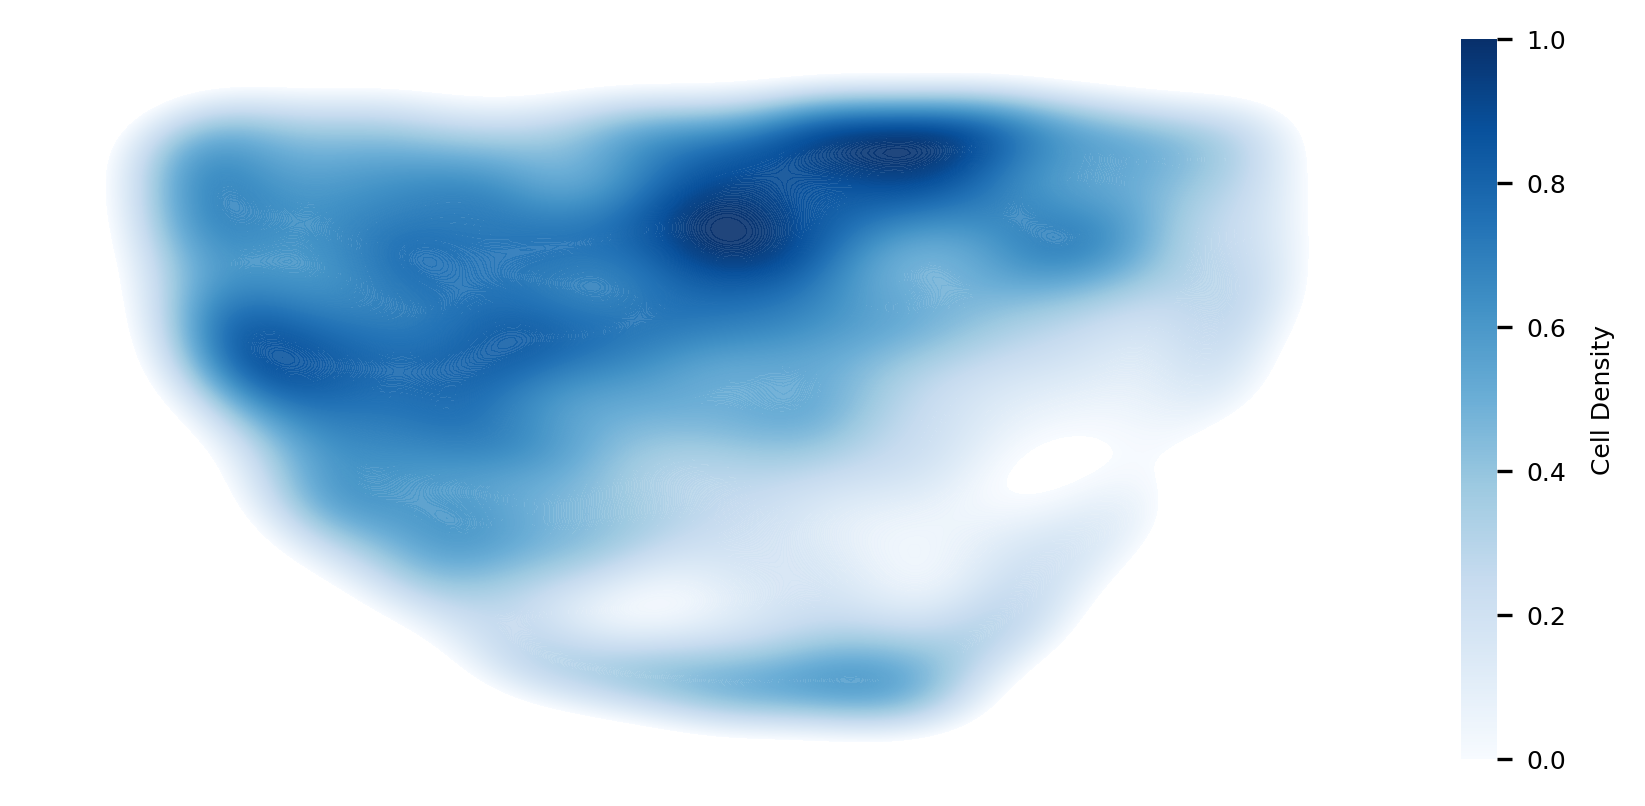

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 提高全局 DPI 以匹配保存时的 DPI
plt.rcParams['figure.dpi'] = 300  

def plot_circular_density(file_path, cmap_color="Greens", save_path="circular_density_plot.png"):
    """
    读取 CSV 数据并绘制 Circular Density Plot，并在右下角添加比例尺（颜色条）。
    确保所有坐标点都在图中展示，不进行裁切，而是自动调整坐标轴范围。

    参数:
    - file_path: CSV 文件路径
    - cmap_color: 颜色映射（如 "Greens" 或 HTML 颜色代码 "#FF5733"）
    - save_path: 图片保存路径（默认保存为 circular_density_plot.png）
    """
    
    # 读取数据
    try:
        df = pd.read_csv(file_path)
        df = df[['X','Y']]
        df.columns = df.columns.str.lower()
    except Exception as e:
        print(f"文件读取错误: {e}")
        return

    # 确保数据包含 'x' 和 'y' 列
    if not {'x', 'y'}.issubset(df.columns):
        print("错误: CSV 文件必须包含 'x' 和 'y' 列！")
        return
    
    # 确保数据是数值型
    df['x'] = pd.to_numeric(df['x'], errors='coerce')
    df['y'] = pd.to_numeric(df['y'], errors='coerce')

    if df.isnull().values.any():
        print("错误: 数据包含无效值，无法绘制！")
        return

    # **计算坐标轴范围，确保所有点都可见**
    x_min, x_max = df['x'].min(), df['x'].max()
    y_min, y_max = df['y'].min(), df['y'].max()
    padding_x = (x_max - x_min) * 0.1  # 10% 额外边距
    padding_y = (y_max - y_min) * 0.1  # 10% 额外边距

    # 创建 Matplotlib 图形
    fig, ax = plt.subplots(figsize=(6, 6))

    # 解析颜色映射
    if cmap_color.startswith("#"):
        try:
            cmap_color = mcolors.LinearSegmentedColormap.from_list("custom", [cmap_color])
        except ValueError:
            print(f"错误: 无法解析颜色 {cmap_color}，请使用有效颜色！")
            return
    else:
        cmap_color = sns.color_palette(cmap_color, as_cmap=True)

    # 绘制 KDE 密度图
    try:
        kde = sns.kdeplot(
            x=df.x, y=df.y, 
            cmap=cmap_color, 
            fill=True, 
            levels=500,    # **增加颜色层数**
            bw_adjust=0.9, # **适当增加平滑度**
            ax=ax, 
            alpha=0.9    
        )
    except Exception as e:
        print(f"KDE 计算错误: {e}")
        return

    # **确保所有点可见**
    ax.set_xlim(x_min - padding_x, x_max + padding_x)
    ax.set_ylim(y_min - padding_y, y_max + padding_y)
    ax.set_aspect('equal')  # 保持坐标轴比例一致
    ax.axis('off')  # 隐藏坐标轴

    # **优化颜色比例尺**
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # **扩大颜色条区域**
    norm = plt.Normalize(vmin=0, vmax=1)  # 归一化颜色映射
    sm = plt.cm.ScalarMappable(cmap=cmap_color, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cbar_ax, orientation='vertical')
    
    # **去除颜色条黑色边框**
    cbar.outline.set_visible(False)  
    
    # **提高刻度字体清晰度**
    cbar.ax.tick_params(labelsize=6)  # 刻度字体大小
    cbar.set_label("Cell Density", fontsize=6, labelpad=6)  # 标题字体大小

    # **保存高清图片**
    fig.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)  
    print(f"✅ 图片已保存到: {save_path}")

    # 显示图像
    plt.show()

# 设置数据文件路径
file_path = "top view-坐标.csv"

# 运行绘制并保存图片
plot_circular_density(file_path, cmap_color="Blues", save_path="top_view.png")